In [ ]:
!pip install -qU matplotlib

In [43]:
import json

In [44]:
import argparse
parser = argparse.ArgumentParser()
args = parser.parse_args("")

In [ ]:
from utils import check


args.dataset="commonsenseqa" # 1. 자신 데이터셋 넣기
args.method="zero_shot"

In [ ]:
# with open("./gsm8k_meta-llama_Llama-3.2-3B-Instruct_test_initial_response.jsonl", "r") as f:
with open(f"../logs/{args.dataset}_meta-llama_Llama-3.2-3B-Instruct_test_initial_response.jsonl", "r") as f:
    lines = f.readlines()

initial_idxs=[]
for idx, line in enumerate(lines):
    inst = json.loads(line)
    if inst['correct']:
        initial_idxs.append(idx)

In [62]:
len(initial_idxs) / len(lines) * 100, len(initial_idxs), len(lines)

(67.23996723996723, 821, 1221)

In [63]:
with open(f"../logs/evaluate_{args.dataset}.jsonl", "r") as f:
    ref_lines = f.readlines()
with open(f"../logs/evaluate_{args.dataset}_dpo_correct.jsonl", "r") as f:
    correct_lines = f.readlines()
with open(f"../logs/evaluate_{args.dataset}_dpo_full.jsonl", "r") as f:
    full_lines = f.readlines()
with open(f"../logs/evaluate_{args.dataset}_dpo_wrong.jsonl", "r") as f:
    wrong_lines = f.readlines()

In [64]:
import re
# def check(pred, label):
#     pred = pred.replace(',','')
#     label = label.replace(',','')
#     pred = re.findall(r"\d+", pred)
#     if len(pred) > 0:
#         pred = pred[-1]
#     else:
#         pred = ""
#     return pred == label


def distinguish(lines, initial_idxs):
    output = [0,0,0,0]
    for idx, line in enumerate(lines):
        inst = json.loads(line)
        pred = inst['pred']
        label = inst['label']
        after = check(args, pred, label)
        if idx in initial_idxs: # initially correct
            if after:
                output[0]+=1
            else:
                output[1]+=1
        else: # initially wrong
            if after:
                output[2]+=1
            else:
                output[3]+=1
    return output

In [65]:
pred = re.findall(r'A|B|C|D|E', "boxed{D}")

In [71]:
ref_outputs = distinguish(ref_lines, initial_idxs)
correct_outputs = distinguish(correct_lines, initial_idxs)
full_outputs = distinguish(full_lines, initial_idxs)
wrong_outputs = distinguish(wrong_lines, initial_idxs)

pred: D, label: A
pred: A, label: A
pred: B, label: B
pred: A, label: A
pred: D, label: A
pred: C, label: C
pred: B, label: B
pred: D, label: D
pred: B, label: A
pred: B, label: C
pred: E, label: E
pred: A, label: D
pred: A, label: A
pred: D, label: D
pred: E, label: C
pred: B, label: D
pred: E, label: D
pred: E, label: E
pred: B, label: E
pred: D, label: D
pred: , label: D
pred: , label: C
pred: B, label: D
pred: B, label: D
pred: A, label: E
pred: D, label: D
pred: A, label: B
pred: , label: A
pred: B, label: B
pred: B, label: B
pred: B, label: B
pred: A, label: A
pred: C, label: E
pred: D, label: D
pred: C, label: E
pred: A, label: C
pred: C, label: C
pred: A, label: B
pred: C, label: A
pred: C, label: B
pred: E, label: B
pred: D, label: B
pred: B, label: E
pred: E, label: E
pred: A, label: D
pred: E, label: E
pred: A, label: A
pred: E, label: E
pred: E, label: E
pred: D, label: C
pred: B, label: C
pred: B, label: B
pred: C, label: D
pred: , label: C
pred: D, label: D
pred: E, label

In [72]:
ref_outputs, correct_outputs, full_outputs, wrong_outputs

([290, 531, 151, 249],
 [748, 73, 59, 341],
 [663, 158, 125, 275],
 [237, 584, 182, 218])

In [73]:
# full_outputs=[0,0,0,0]
# wrong_outputs=[0,0,0,0]

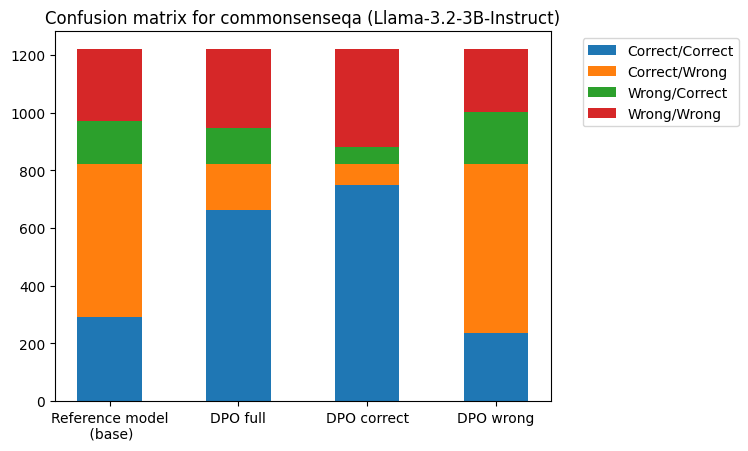

In [74]:
import matplotlib.pyplot as plt
import numpy as np


models = (
    "Reference model\n (base)",
    "DPO full",
    "DPO correct",
    "DPO wrong"
)
verdict_counts = {
    "Correct/Correct": np.array([ref_outputs[0], full_outputs[0], correct_outputs[0], wrong_outputs[0]]),
    "Correct/Wrong": np.array([ref_outputs[1], full_outputs[1], correct_outputs[1], wrong_outputs[1]]),
    "Wrong/Correct": np.array([ref_outputs[2], full_outputs[2], correct_outputs[2], wrong_outputs[2]]),
    "Wrong/Wrong": np.array([ref_outputs[3], full_outputs[3], correct_outputs[3], wrong_outputs[3]]),
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(4)

for verdict, count in verdict_counts.items():
    p = ax.bar(models, count, width, label=verdict, bottom=bottom)
    bottom += count

ax.set_title(f"Confusion matrix for {args.dataset} (Llama-3.2-3B-Instruct)")
# ax.legend(loc="upper left")
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()

## 모두 끝났습니다! 수고하셨습니다 :)